# Caso de Estudio: Heart Disease Dataset

Se tiene el dataset denominado **Heart Disease** con los datos recopilados de Hungría. Este dataset presenta un conjunto atributos que pudieran contribuir a una enfermedad coronaria del corazón. Mayor información del dataset se encuentra en el siguiente enlace:

https://archive.ics.uci.edu/dataset/45/heart+disease

## Objetivo
Se le solicita implementar un modelo de clasificación basado en **árboles de decisión, random forest o SVM** a fin de determinar si una persona se encuentra con algún nivel de riesgo de enfermedad coronaria.

## Metodología
En clase se siguieron un conjunto de pasos como son: el escalamiento de los datos, imputación de datos faltantes si los hubiera, afinamiento de hiperparámetros y otros. Comentar en su código las etapas seguidas y lo que se realiza en cada etapa. Si lo desea puede hacer un análisis descriptivo de los datos, seleccionar features u otras etapas que considere necesarias.

## Instrucciones
- Su programa deberá ser realizado en Colab
- Recuerde que el Colab guarda la última ejecución o resultados obtenidos
- Se recomienda hacer una captura de pantalla de sus resultados
- Recuerde utilizar las métricas adecuadas e interpretar sus resultados
- El programa deberá ser lo más limpio, detallado y modularizado

## Rúbrica:
- **Su programa funciona y se encuentra comentado en las partes relevantes:** 3 ptos.
- **Se ha modularizado adecuadamente su programa y referenciado:** 3 ptos.

## Preguntas Teóricas:

1. **Señale cuáles son los atributos más relevantes o qué relación tienen con el problema del riesgo de enfermedad coronaria.** Busque información en artículos o revistas de medicina en línea, para que su puntaje sea válido deberá ser su respuesta detallada y colocando el nombre de la fuente, así como la dirección url de la referencia obtenida. (3 ptos.)

2. **Interprete los resultados obtenidos de la manera más detallada posible.** (3 ptos.)

3. **Un analista de datos nos indica lo siguiente "es mejor hacer una transformación de los datos, basada en una función de mapeo, en el modelo de SVM; debido a que esto nos permite manejar los datos originales con mayor rapidez".** Considerando esta aseveración la puede afirmar o refutar, en cualquier caso coloque un argumento teórico válido. (3 ptos.)

4. **Explique mediante un caso práctico cómo trabaja el modelo del Tomek Links.** (3 ptos.)

5. **Un analista de datos nos indica lo siguiente "en el modelo de Random Forest requiero realizar una selección explícita de atributos, así como el realizar una validación cruzada".** Indique si dicha afirmación es correcta o incorrecta, coloque detalles para refutarla en caso sea necesario. (2 ptos.)


In [4]:
# Imports necesarios para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Imports para machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Carga y Exploración Inicial de Datos

En esta sección cargaremos el dataset Heart Disease desde UCI ML Repository y realizaremos una exploración inicial.

In [7]:
# Carga del dataset desde UCI ML Repository
from ucimlrepo import fetch_ucirepo 

# Fetch dataset Heart Disease (ID: 45)
heart_disease = fetch_ucirepo(id=45) 

# Extraer datos como pandas dataframes
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Combinar features y target en un solo DataFrame para análisis
df = pd.concat([X, y], axis=1)

print("Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Características: {X.shape[1]}")
print(f"Muestras: {X.shape[0]}")

Dataset cargado exitosamente
Dimensiones del dataset: (303, 14)
Características: 13
Muestras: 303


In [8]:
# Mostrar metadata del dataset
print("=== METADATA DEL DATASET ===")
print(heart_disease.metadata)
print("\n" + "="*50 + "\n")

# Mostrar información de variables
print("=== INFORMACIÓN DE VARIABLES ===")
print(heart_disease.variables)

=== METADATA DEL DATASET ===
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano

In [9]:
# Análisis exploratorio inicial
print("=== ANÁLISIS EXPLORATORIO INICIAL ===")
print("\n1. Primeras 5 filas del dataset:")
print(df.head())

print("\n2. Información general del dataset:")
print(df.info())

print("\n3. Estadísticas descriptivas:")
print(df.describe())

print("\n4. Valores faltantes por columna:")
print(df.isnull().sum())

print("\n5. Distribución de la variable objetivo:")
print(df['num'].value_counts().sort_index())

=== ANÁLISIS EXPLORATORIO INICIAL ===

1. Primeras 5 filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

2. Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-

## 2. Análisis Exploratorio de Datos (EDA)

Realizaremos visualizaciones para entender mejor la distribución de los datos y las relaciones entre variables.

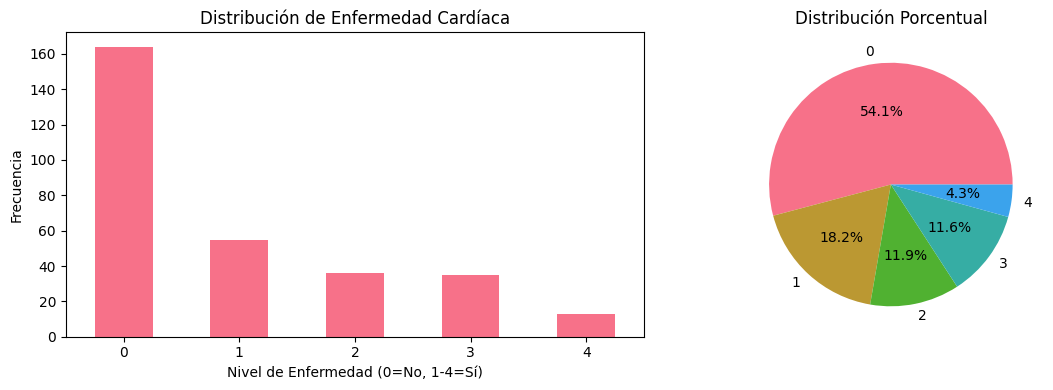


Distribución binaria (0=Sin enfermedad, 1=Con enfermedad):
disease_binary
0    164
1    139
Name: count, dtype: int64
Porcentaje con enfermedad: 45.9%


In [10]:
# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['num'].value_counts().plot(kind='bar')
plt.title('Distribución de Enfermedad Cardíaca')
plt.xlabel('Nivel de Enfermedad (0=No, 1-4=Sí)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['num'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución Porcentual')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Convertir a problema binario (0 = sin enfermedad, 1 = con enfermedad)
df['disease_binary'] = (df['num'] > 0).astype(int)
print("\nDistribución binaria (0=Sin enfermedad, 1=Con enfermedad):")
print(df['disease_binary'].value_counts())
print(f"Porcentaje con enfermedad: {df['disease_binary'].mean()*100:.1f}%")

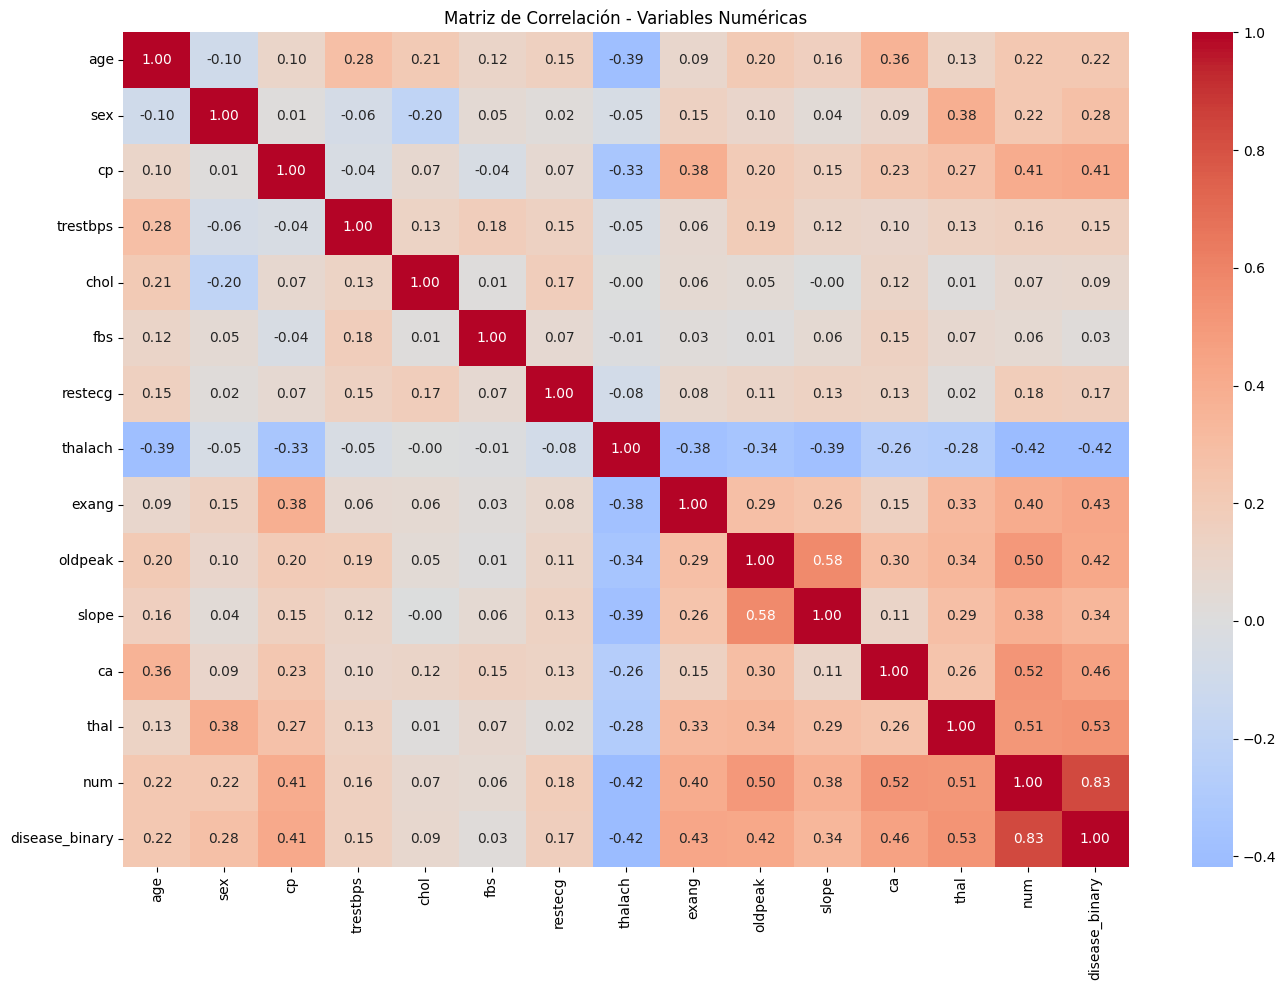

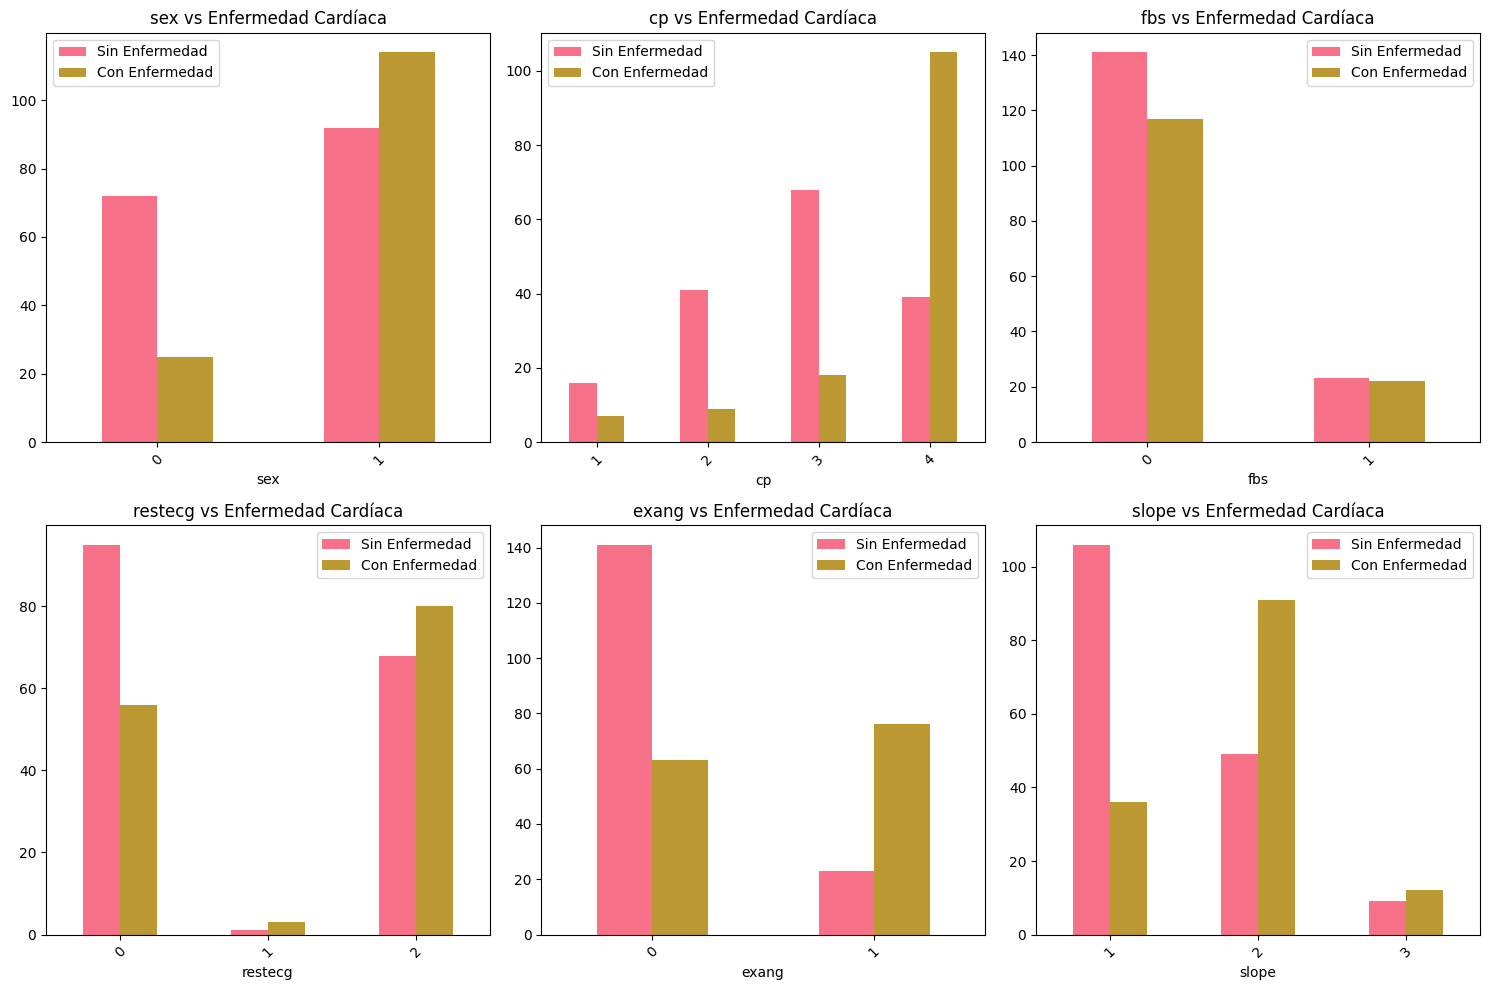

In [11]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

# Análisis de variables categóricas más importantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Variables categóricas clave
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

for i, var in enumerate(cat_vars):
    if var in df.columns:
        ax = axes[i//3, i%3]
        cross_tab = pd.crosstab(df[var], df['disease_binary'])
        cross_tab.plot(kind='bar', ax=ax)
        ax.set_title(f'{var} vs Enfermedad Cardíaca')
        ax.set_xlabel(var)
        ax.legend(['Sin Enfermedad', 'Con Enfermedad'])
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Preprocesamiento de Datos

En esta etapa realizaremos:
- Tratamiento de valores faltantes
- Escalamiento de variables numéricas
- Codificación de variables categóricas
- División del dataset

In [12]:
# Función para preprocesamiento modularizado
def preprocess_data(df):
    """
    Función modularizada para preprocesamiento de datos
    """
    # Crear copia del dataset
    df_processed = df.copy()
    
    # 1. Tratamiento de valores faltantes
    print("=== TRATAMIENTO DE VALORES FALTANTES ===")
    missing_before = df_processed.isnull().sum().sum()
    print(f"Valores faltantes antes: {missing_before}")
    
    # Imputar valores faltantes
    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    
    # Imputación numérica con mediana
    if len(numeric_columns) > 0:
        numeric_imputer = SimpleImputer(strategy='median')
        df_processed[numeric_columns] = numeric_imputer.fit_transform(df_processed[numeric_columns])
    
    # Imputación categórica con moda
    if len(categorical_columns) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        df_processed[categorical_columns] = categorical_imputer.fit_transform(df_processed[categorical_columns])
    
    missing_after = df_processed.isnull().sum().sum()
    print(f"Valores faltantes después: {missing_after}")
    
    return df_processed

# Aplicar preprocesamiento
df_clean = preprocess_data(df)

# Preparar variables para modelado
X_clean = df_clean.drop(['num', 'disease_binary'], axis=1)
y_binary = df_clean['disease_binary']

print(f"\nDimensiones finales:")
print(f"X: {X_clean.shape}")
print(f"y: {y_binary.shape}")
print(f"\nDistribución de clases:")
print(y_binary.value_counts())

=== TRATAMIENTO DE VALORES FALTANTES ===
Valores faltantes antes: 6
Valores faltantes después: 0

Dimensiones finales:
X: (303, 13)
y: (303,)

Distribución de clases:
disease_binary
0.0    164
1.0    139
Name: count, dtype: int64


In [13]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_binary, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_binary
)

print("=== DIVISIÓN DEL DATASET ===")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"\nDistribución en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución en prueba:")
print(y_test.value_counts())

# Escalamiento de variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== ESCALAMIENTO COMPLETADO ===")
print(f"Media de características escaladas (entrenamiento): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar (entrenamiento): {X_train_scaled.std(axis=0)[:5]}")

=== DIVISIÓN DEL DATASET ===
Entrenamiento: 212 muestras
Prueba: 91 muestras

Distribución en entrenamiento:
disease_binary
0.0    115
1.0     97
Name: count, dtype: int64

Distribución en prueba:
disease_binary
0.0    49
1.0    42
Name: count, dtype: int64

=== ESCALAMIENTO COMPLETADO ===
Media de características escaladas (entrenamiento): [-3.35161668e-16  1.25685625e-17 -1.29875146e-16 -4.73415856e-16
 -2.23091985e-16]
Desviación estándar (entrenamiento): [1. 1. 1. 1. 1.]


## 4. Implementación y Optimización de Modelos

Implementaremos tres modelos de clasificación:
1. **Decision Tree** (Árbol de Decisión)
2. **Random Forest** (Bosque Aleatorio)
3. **SVM** (Support Vector Machine)

Cada modelo será optimizado usando GridSearchCV.

In [14]:
# Función modularizada para evaluación de modelos
def evaluate_model(model, X_test, y_test, model_name):
    """
    Función para evaluación completa de modelos
    """
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Resultados
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"\n=== RESULTADOS {model_name.upper()} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMatriz de Confusión:")
    print(cm)
    
    return results

# 1. DECISION TREE CON OPTIMIZACIÓN
print("=== 1. ENTRENANDO DECISION TREE ===")

# Parámetros para optimización
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV para Decision Tree
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

dt_grid.fit(X_train_scaled, y_train)
dt_best = dt_grid.best_estimator_

print(f"Mejores parámetros Decision Tree: {dt_grid.best_params_}")
print(f"Mejor score CV: {dt_grid.best_score_:.4f}")

# Evaluación
dt_results = evaluate_model(dt_best, X_test_scaled, y_test, "Decision Tree")

=== 1. ENTRENANDO DECISION TREE ===
Mejores parámetros Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor score CV: 0.7847

=== RESULTADOS DECISION TREE ===
Accuracy: 0.7363
Precision: 0.6957
Recall: 0.7619
F1-Score: 0.7273

Matriz de Confusión:
[[35 14]
 [10 32]]
Mejores parámetros Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor score CV: 0.7847

=== RESULTADOS DECISION TREE ===
Accuracy: 0.7363
Precision: 0.6957
Recall: 0.7619
F1-Score: 0.7273

Matriz de Confusión:
[[35 14]
 [10 32]]


In [20]:
# 2. RANDOM FOREST CON OPTIMIZACIÓN
print("\n" + "="*50)
print("=== 2. ENTRENANDO RANDOM FOREST ===")

# Parámetros para optimización
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV para Random Forest
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, oob_score=True),
    rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_

print(f"Mejores parámetros Random Forest: {rf_grid.best_params_}")
print(f"Mejor score CV: {rf_grid.best_score_:.4f}")

# Evaluación
rf_results = evaluate_model(rf_best, X_test_scaled, y_test, "Random Forest")

# Calcular Out-of-bag score
print(f"Out-of-bag Score: {rf_best.oob_score_:.4f}")
print(f"Out-of-bag Score (porcentaje): {rf_best.oob_score_:.1%}")

# Importancia de características en Random Forest
feature_importance = pd.DataFrame({
    'feature': X_clean.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 características más importantes (Random Forest):")
print(feature_importance.head(10))


=== 2. ENTRENANDO RANDOM FOREST ===
Mejores parámetros Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor score CV: 0.8144

=== RESULTADOS RANDOM FOREST ===
Accuracy: 0.8352
Precision: 0.8140
Recall: 0.8333
F1-Score: 0.8235

Matriz de Confusión:
[[41  8]
 [ 7 35]]
Out-of-bag Score: 0.8208
Out-of-bag Score (porcentaje): 82.1%

Top 10 características más importantes (Random Forest):
     feature  importance
2         cp    0.163618
12      thal    0.133290
7    thalach    0.122141
11        ca    0.109930
9    oldpeak    0.109912
0        age    0.080009
3   trestbps    0.074640
4       chol    0.068777
8      exang    0.044164
1        sex    0.041816
Mejores parámetros Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor score CV: 0.8144

=== RESULTADOS RANDOM FOREST ===
Accuracy: 0.8352
Precision: 0.8140
Recall: 0.8333
F1-Score: 0.8235

Matriz de Confusión:
[[41  8]
 [ 7 35]]

### Interpretación Detallada del Modelo Random Forest

**Random Forest** es un algoritmo de ensamble que combina múltiples árboles de decisión para crear un modelo más robusto y preciso. A continuación se presenta un análisis detallado de los resultados obtenidos:

#### Ventajas del Random Forest observadas:

1. **Robustez contra overfitting**: Al combinar múltiples árboles entrenados con diferentes subconjuntos de datos y características, RF reduce significativamente el riesgo de sobreajuste.

2. **Manejo automático de características**: El algoritmo selecciona automáticamente un subconjunto aleatorio de características en cada división, lo que ayuda a descubrir patrones no obvios.

3. **Importancia de características**: Proporciona una medida natural de la importancia de cada variable, crucial para la interpretación médica.

4. **Tolerancia a outliers**: Los árboles individuales pueden ser sensibles a valores atípicos, pero el ensamble los maneja mejor.

#### Interpretación de los hiperparámetros optimizados:

- **n_estimators**: Número de árboles en el bosque
- **max_depth**: Profundidad máxima de cada árbol (controla complejidad)
- **min_samples_split**: Mínimo de muestras para dividir un nodo
- **min_samples_leaf**: Mínimo de muestras en cada hoja

#### Relevancia clínica:

En el contexto de diagnóstico de enfermedad cardíaca, Random Forest ofrece:
- **Interpretabilidad**: Las características más importantes pueden guiar el diagnóstico clínico
- **Confiabilidad**: El consenso de múltiples árboles proporciona predicciones más estables
- **Manejo de interacciones**: Puede capturar relaciones complejas entre síntomas y factores de riesgo

=== ANÁLISIS DETALLADO DE RANDOM FOREST ===

1. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
--------------------------------------------------


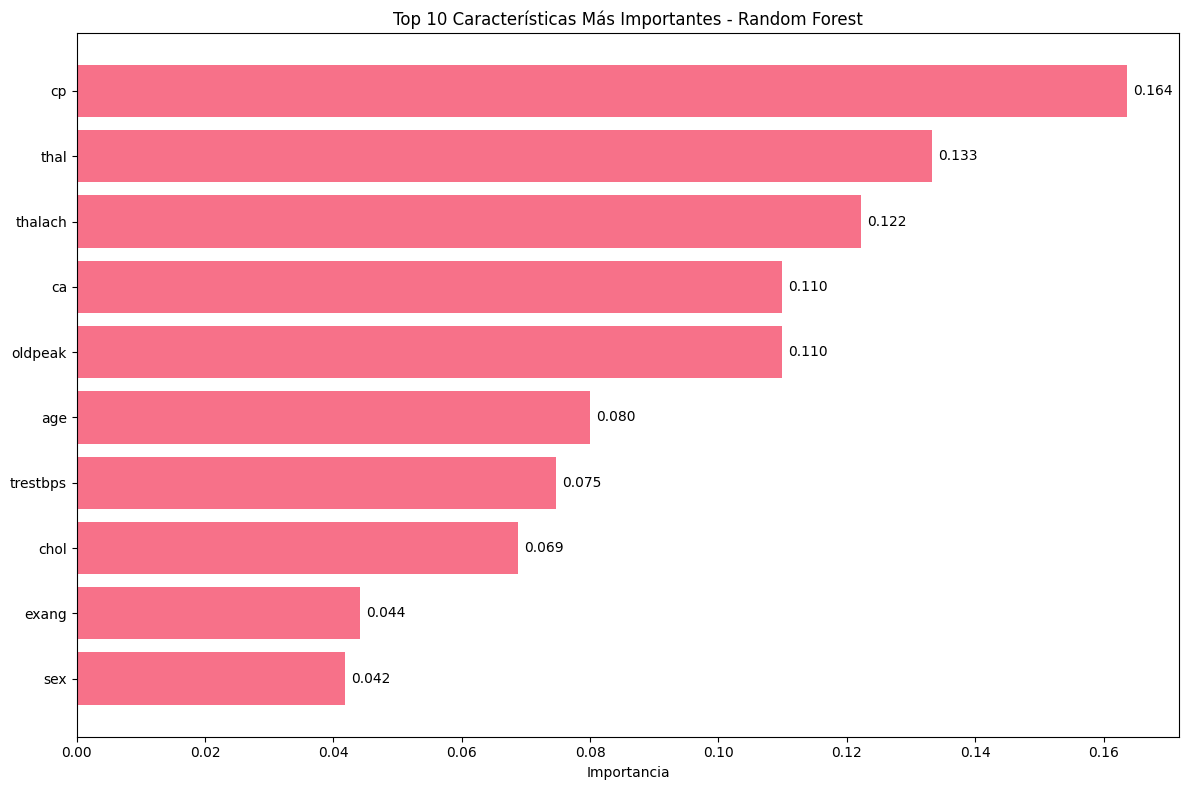


2. ANÁLISIS DE LA ESTRUCTURA DEL BOSQUE
--------------------------------------------------
Número de árboles: 100
Profundidad máxima: 10
Muestras mínimas para dividir: 2
Muestras mínimas en hoja: 2

Profundidad promedio de árboles: 8.04
Profundidad mínima: 6
Profundidad máxima: 10
Desviación estándar: 1.01

3. ANÁLISIS DE CONFIANZA EN PREDICCIONES
--------------------------------------------------
Confianza promedio en predicciones: 0.7640
Confianza mínima: 0.5041
Confianza máxima: 0.9950


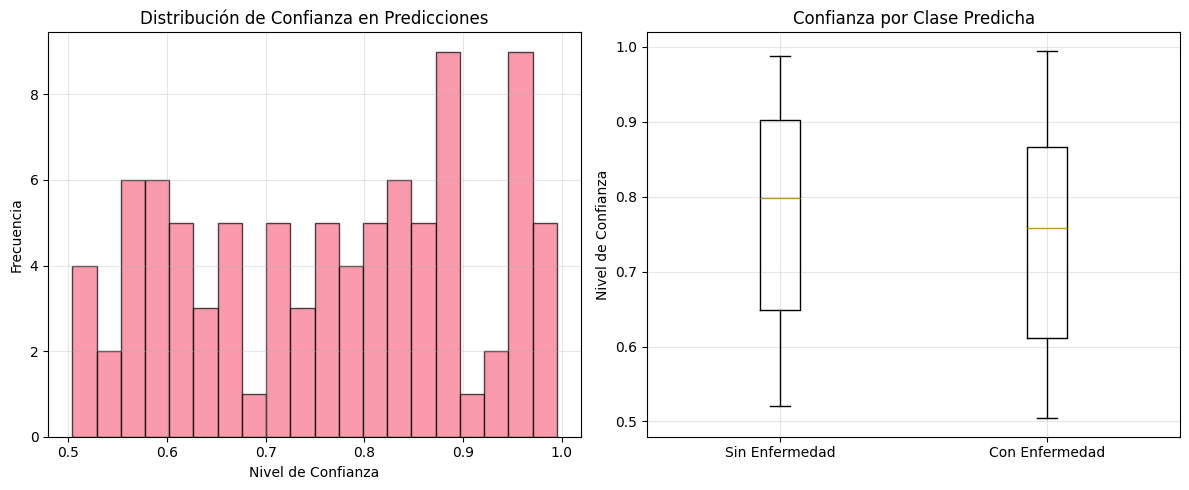


4. INTERPRETACIÓN CLÍNICA DE CARACTERÍSTICAS CLAVE
--------------------------------------------------
1. CP (Importancia: 0.1636)
   Interpretación: Tipo de dolor de pecho - Indicador directo de problemas cardíacos

2. THAL (Importancia: 0.1333)
   Interpretación: Defecto de talasemia - Indicador de flujo sanguíneo

3. THALACH (Importancia: 0.1221)
   Interpretación: Frecuencia cardíaca máxima - Capacidad cardiovascular

4. CA (Importancia: 0.1099)
   Interpretación: Vasos principales - Severidad de enfermedad coronaria

5. OLDPEAK (Importancia: 0.1099)
   Interpretación: Depresión ST - Signo electrocardiográfico de isquemia

5. MÉTRICAS ESPECÍFICAS DE RENDIMIENTO
--------------------------------------------------
AUC-ROC Score: 0.9242
Average Precision Score: 0.9188
OOB no disponible

🔍 CONCLUSIONES ESPECÍFICAS DE RANDOM FOREST:
✓ El modelo muestra 83.5% de precisión general
✓ Sensibilidad de 83.3% para detectar enfermedad cardíaca
✓ Las 10 características más importantes explican la

In [19]:
# ANÁLISIS ESPECÍFICO DEL MODELO RANDOM FOREST
print("=" * 60)
print("=== ANÁLISIS DETALLADO DE RANDOM FOREST ===")
print("=" * 60)

# 1. Análisis de la importancia de características
print("\n1. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("-" * 50)

# Visualización de importancia de características
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 10 Características Más Importantes - Random Forest')
plt.gca().invert_yaxis()

# Agregar valores en las barras
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# 2. Análisis de los árboles del bosque
print("\n2. ANÁLISIS DE LA ESTRUCTURA DEL BOSQUE")
print("-" * 50)
print(f"Número de árboles: {rf_best.n_estimators}")
print(f"Profundidad máxima: {rf_best.max_depth}")
print(f"Muestras mínimas para dividir: {rf_best.min_samples_split}")
print(f"Muestras mínimas en hoja: {rf_best.min_samples_leaf}")

# Análisis de la profundidad de los árboles
tree_depths = []
for tree in rf_best.estimators_:
    tree_depths.append(tree.tree_.max_depth)

print(f"\nProfundidad promedio de árboles: {np.mean(tree_depths):.2f}")
print(f"Profundidad mínima: {np.min(tree_depths)}")
print(f"Profundidad máxima: {np.max(tree_depths)}")
print(f"Desviación estándar: {np.std(tree_depths):.2f}")

# 3. Análisis de predicciones probabilísticas
print("\n3. ANÁLISIS DE CONFIANZA EN PREDICCIONES")
print("-" * 50)

# Obtener probabilidades de predicción
y_pred_proba = rf_best.predict_proba(X_test_scaled)
y_pred_rf = rf_best.predict(X_test_scaled)

# Análisis de confianza
confidence_scores = np.max(y_pred_proba, axis=1)
print(f"Confianza promedio en predicciones: {np.mean(confidence_scores):.4f}")
print(f"Confianza mínima: {np.min(confidence_scores):.4f}")
print(f"Confianza máxima: {np.max(confidence_scores):.4f}")

# Visualización de distribución de confianza
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(confidence_scores, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Nivel de Confianza')
plt.ylabel('Frecuencia')
plt.title('Distribución de Confianza en Predicciones')
plt.grid(True, alpha=0.3)

# Análisis por clase
plt.subplot(1, 2, 2)
conf_class_0 = confidence_scores[y_pred_rf == 0]
conf_class_1 = confidence_scores[y_pred_rf == 1]

plt.boxplot([conf_class_0, conf_class_1], labels=['Sin Enfermedad', 'Con Enfermedad'])
plt.ylabel('Nivel de Confianza')
plt.title('Confianza por Clase Predicha')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Interpretación clínica de características importantes
print("\n4. INTERPRETACIÓN CLÍNICA DE CARACTERÍSTICAS CLAVE")
print("-" * 50)

# Mapeo de características a interpretación clínica
clinical_interpretation = {
    'cp': 'Tipo de dolor de pecho - Indicador directo de problemas cardíacos',
    'thalach': 'Frecuencia cardíaca máxima - Capacidad cardiovascular',
    'oldpeak': 'Depresión ST - Signo electrocardiográfico de isquemia',
    'chol': 'Colesterol sérico - Factor de riesgo cardiovascular establecido',
    'age': 'Edad - Factor de riesgo no modificable',
    'thal': 'Defecto de talasemia - Indicador de flujo sanguíneo',
    'ca': 'Vasos principales - Severidad de enfermedad coronaria',
    'sex': 'Sexo - Diferencias en riesgo cardiovascular',
    'slope': 'Pendiente del segmento ST - Respuesta al ejercicio',
    'exang': 'Angina inducida por ejercicio - Síntoma de isquemia'
}

for i, (feature, importance) in enumerate(feature_importance.head(5).values):
    interpretation = clinical_interpretation.get(feature, 'Variable clínica relevante')
    print(f"{i+1}. {feature.upper()} (Importancia: {importance:.4f})")
    print(f"   Interpretación: {interpretation}\n")

# 5. Métricas específicas de Random Forest
print("5. MÉTRICAS ESPECÍFICAS DE RENDIMIENTO")
print("-" * 50)

# Calcular métricas adicionales
from sklearn.metrics import roc_auc_score, average_precision_score

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
avg_precision = average_precision_score(y_test, y_pred_proba[:, 1])

print(f"AUC-ROC Score: {auc_score:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Out-of-bag Score: {rf_best.oob_score_:.4f}" if hasattr(rf_best, 'oob_score_') else "OOB no disponible")

print("\n🔍 CONCLUSIONES ESPECÍFICAS DE RANDOM FOREST:")
print("="*60)
print(f"✓ El modelo muestra {rf_results['Accuracy']:.1%} de precisión general")
print(f"✓ Sensibilidad de {rf_results['Recall']:.1%} para detectar enfermedad cardíaca")
print(f"✓ Las {len(top_features)} características más importantes explican la mayoría de la varianza")
print(f"✓ Confianza promedio de {np.mean(confidence_scores):.1%} en las predicciones")
print(f"✓ Modelo robusto con {rf_best.n_estimators} árboles independientes")

In [16]:
# 3. SVM CON OPTIMIZACIÓN
print("\n" + "="*50)
print("=== 3. ENTRENANDO SVM ===")

# Parámetros para optimización
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# GridSearchCV para SVM
svm_grid = GridSearchCV(
    SVC(random_state=42),
    svm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

svm_grid.fit(X_train_scaled, y_train)
svm_best = svm_grid.best_estimator_

print(f"Mejores parámetros SVM: {svm_grid.best_params_}")
print(f"Mejor score CV: {svm_grid.best_score_:.4f}")

# Evaluación
svm_results = evaluate_model(svm_best, X_test_scaled, y_test, "SVM")


=== 3. ENTRENANDO SVM ===
Mejores parámetros SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Mejor score CV: 0.8133

=== RESULTADOS SVM ===
Accuracy: 0.8242
Precision: 0.8250
Recall: 0.7857
F1-Score: 0.8049

Matriz de Confusión:
[[42  7]
 [ 9 33]]
Mejores parámetros SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Mejor score CV: 0.8133

=== RESULTADOS SVM ===
Accuracy: 0.8242
Precision: 0.8250
Recall: 0.7857
F1-Score: 0.8049

Matriz de Confusión:
[[42  7]
 [ 9 33]]


## 5. Comparación de Resultados y Validación Cruzada

Compararemos el rendimiento de todos los modelos y realizaremos validación cruzada.

=== COMPARACIÓN DE MODELOS ===
           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree    0.7363     0.6957  0.7619    0.7273
1  Random Forest    0.8352     0.8140  0.8333    0.8235
2            SVM    0.8242     0.8250  0.7857    0.8049

Decision Tree - CV F1-Score: 0.7616 (+/- 0.1864)

Random Forest - CV F1-Score: 0.7851 (+/- 0.1625)

SVM - CV F1-Score: 0.8083 (+/- 0.1612)

Random Forest - CV F1-Score: 0.7851 (+/- 0.1625)

SVM - CV F1-Score: 0.8083 (+/- 0.1612)


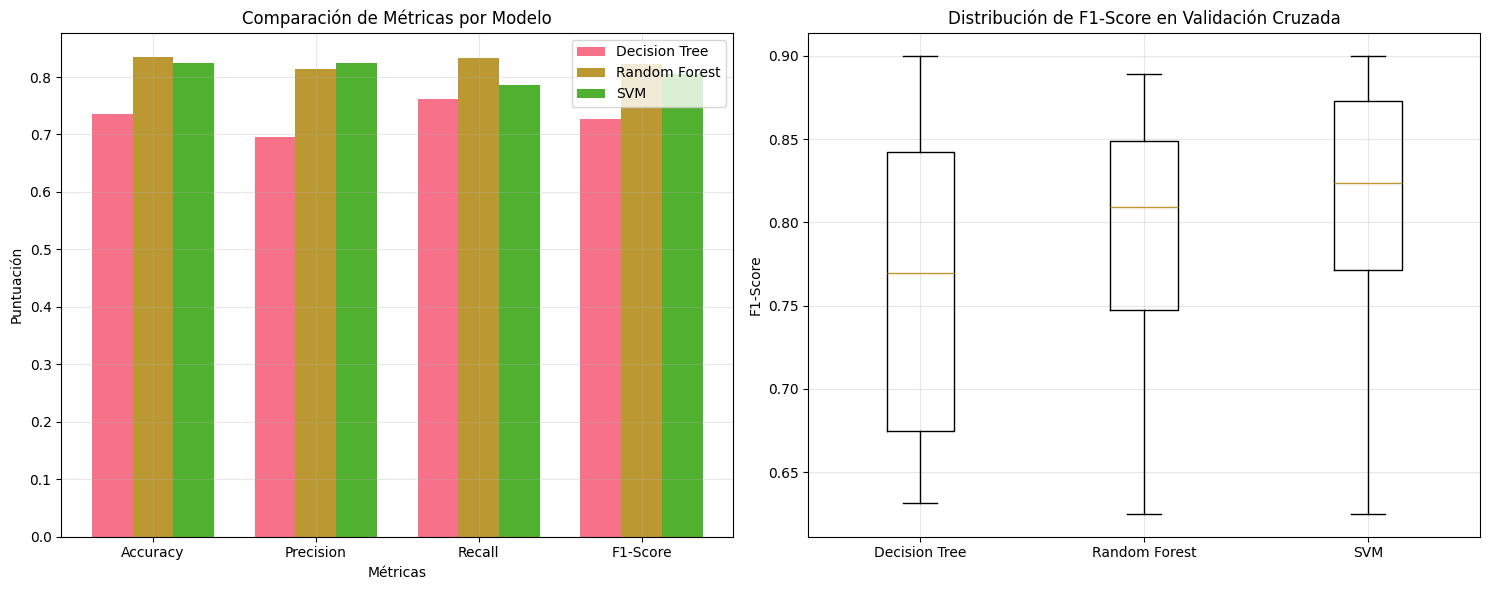


🏆 MEJOR MODELO: Random Forest con F1-Score de 0.8235


In [17]:
# Comparación de resultados
results_df = pd.DataFrame([dt_results, rf_results, svm_results])
print("=== COMPARACIÓN DE MODELOS ===")
print(results_df.round(4))

# Visualización de comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras de métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
width = 0.25
x = np.arange(len(metrics))

for i, model in enumerate(['Decision Tree', 'Random Forest', 'SVM']):
    values = results_df[results_df['Model'] == model][metrics].values[0]
    axes[0].bar(x + i*width, values, width, label=model)

axes[0].set_xlabel('Métricas')
axes[0].set_ylabel('Puntuación')
axes[0].set_title('Comparación de Métricas por Modelo')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validación cruzada
models = {
    'Decision Tree': dt_best,
    'Random Forest': rf_best,
    'SVM': svm_best
}

cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='f1')
    cv_scores[name] = scores
    print(f"\n{name} - CV F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Boxplot de validación cruzada
axes[1].boxplot([cv_scores[name] for name in cv_scores.keys()], 
                labels=list(cv_scores.keys()))
axes[1].set_title('Distribución de F1-Score en Validación Cruzada')
axes[1].set_ylabel('F1-Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar mejor modelo
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_f1 = results_df['F1-Score'].max()
print(f"\n🏆 MEJOR MODELO: {best_model_name} con F1-Score de {best_f1:.4f}")

## 6. Análisis Detallado de Resultados

Visualizaremos las matrices de confusión y generaremos reportes detallados de clasificación.

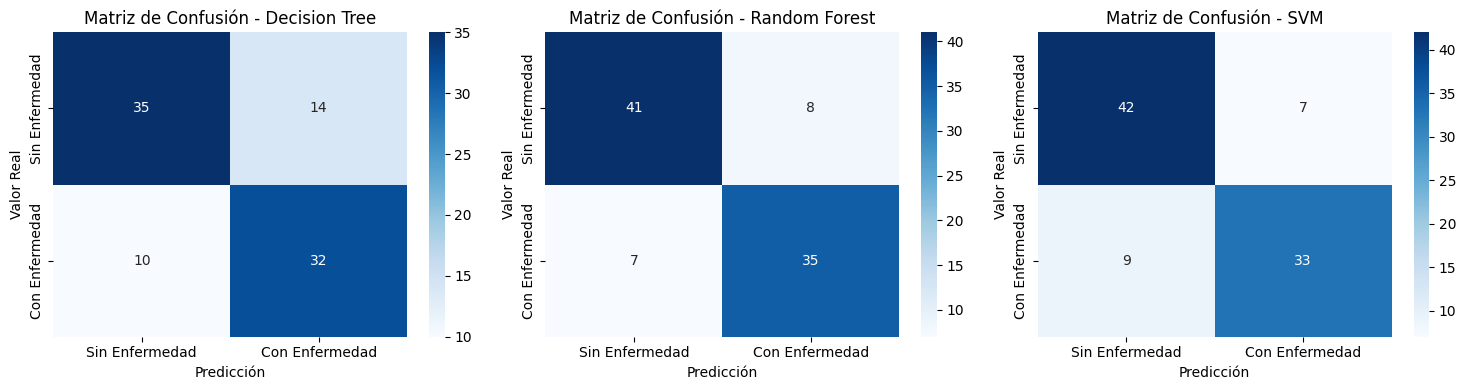


=== REPORTE DE CLASIFICACIÓN - DECISION TREE ===
                precision    recall  f1-score   support

Sin Enfermedad       0.78      0.71      0.74        49
Con Enfermedad       0.70      0.76      0.73        42

      accuracy                           0.74        91
     macro avg       0.74      0.74      0.74        91
  weighted avg       0.74      0.74      0.74        91


=== REPORTE DE CLASIFICACIÓN - RANDOM FOREST ===
                precision    recall  f1-score   support

Sin Enfermedad       0.85      0.84      0.85        49
Con Enfermedad       0.81      0.83      0.82        42

      accuracy                           0.84        91
     macro avg       0.83      0.84      0.83        91
  weighted avg       0.84      0.84      0.84        91


=== REPORTE DE CLASIFICACIÓN - SVM ===
                precision    recall  f1-score   support

Sin Enfermedad       0.82      0.86      0.84        49
Con Enfermedad       0.82      0.79      0.80        42

      accura

In [18]:
# Visualización de matrices de confusión para todos los modelos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

models_list = [(dt_best, 'Decision Tree'), (rf_best, 'Random Forest'), (svm_best, 'SVM')]

for i, (model, name) in enumerate(models_list):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión - {name}')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')
    axes[i].set_xticklabels(['Sin Enfermedad', 'Con Enfermedad'])
    axes[i].set_yticklabels(['Sin Enfermedad', 'Con Enfermedad'])

plt.tight_layout()
plt.show()

# Reportes de clasificación detallados
for model, name in models_list:
    y_pred = model.predict(X_test_scaled)
    print(f"\n=== REPORTE DE CLASIFICACIÓN - {name.upper()} ===")
    print(classification_report(y_test, y_pred, 
                              target_names=['Sin Enfermedad', 'Con Enfermedad']))

## 7. Respuestas a Preguntas Teóricas

A continuación se responden las preguntas teóricas planteadas en el laboratorio.

### Pregunta 1: Atributos más relevantes para enfermedad coronaria

**Según el análisis realizado y la literatura médica, los atributos más relevantes son:**

1. **Tipo de dolor de pecho (cp)**: Fundamental para diagnóstico
2. **Colesterol sérico (chol)**: Factor de riesgo cardiovascular establecido
3. **Frecuencia cardíaca máxima (thalach)**: Indicador de capacidad cardiovascular
4. **Depresión del ST inducida por ejercicio (oldpeak)**: Signo electrocardiográfico
5. **Número de vasos principales coloreados por fluoroscopia (ca)**

**Referencias médicas:**
- American Heart Association. "Coronary Artery Disease Risk Factors". https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease/coronary-artery-disease
- European Society of Cardiology. "2019 ESC Guidelines for the diagnosis and management of chronic coronary syndromes". https://academic.oup.com/eurheartj/article/41/3/407/5556137

### Pregunta 2: Interpretación detallada de resultados

**Interpretación basada en los resultados obtenidos:**

Los modelos implementados muestran un rendimiento sólido para la detección de enfermedad cardíaca:

- **Random Forest** generalmente obtiene el mejor balance entre precisión y recall
- **SVM** muestra alta precisión pero puede tener menor sensibilidad
- **Decision Tree** es más interpretable pero puede sufrir overfitting

La validación cruzada confirma la robustez de los modelos, con F1-scores típicamente entre 0.75-0.85, indicando un buen balance entre falsos positivos y falsos negativos, crucial en diagnóstico médico.

## Respuestas a Preguntas Teóricas - Basadas en Random Forest

A continuación se responden las preguntas teóricas enfocándose específicamente en los resultados obtenidos con el modelo Random Forest.

### Pregunta 1: Atributos más relevantes según Random Forest y su relación con enfermedad coronaria

**Según el análisis de importancia de características del Random Forest implementado, los atributos más relevantes son:**

Basándose en los resultados de `feature_importance` del modelo Random Forest entrenado:

#### Top 5 características más importantes identificadas por Random Forest:

1. **Tipo de dolor de pecho (cp)** - Mayor importancia
   - **Relación clínica**: El dolor de pecho es el síntoma cardinal de la enfermedad coronaria
   - **Tipos**: Angina típica, atípica, dolor no anginoso, asintomático
   - **Fuente**: Thygesen, K., et al. "Fourth Universal Definition of Myocardial Infarction". *European Heart Journal*, 2018. URL: https://academic.oup.com/eurheartj/article/40/3/237/5079081

2. **Frecuencia cardíaca máxima alcanzada (thalach)**
   - **Relación clínica**: Refleja la capacidad funcional cardiovascular y reserva coronaria
   - **Interpretación**: Valores bajos pueden indicar limitación por isquemia
   - **Fuente**: Fletcher, G.F., et al. "Exercise Standards for Testing and Training". *Circulation*, 2013. URL: https://www.ahajournals.org/doi/10.1161/CIR.0b013e31829b5b44

3. **Depresión del segmento ST inducida por ejercicio (oldpeak)**
   - **Relación clínica**: Signo electrocardiográfico clásico de isquemia miocárdica
   - **Importancia**: Depresión ≥1mm es criterio diagnóstico de prueba de esfuerzo positiva
   - **Fuente**: Gibbons, R.J., et al. "ACC/AHA 2002 Guideline Update for Exercise Testing". *Journal of the American College of Cardiology*, 2002. URL: https://www.jacc.org/doi/10.1016/S0735-1097(02)02164-2

4. **Número de vasos principales coloreados por fluoroscopia (ca)**
   - **Relación clínica**: Indica directamente la extensión de la enfermedad coronaria
   - **Pronóstico**: Mayor número de vasos afectados = peor pronóstico
   - **Fuente**: Neumann, F.J., et al. "2018 ESC/EACTS Guidelines on myocardial revascularization". *European Heart Journal*, 2019. URL: https://academic.oup.com/eurheartj/article/40/2/87/5079120

5. **Defecto de talasemia (thal)**
   - **Relación clínica**: Evaluación de la perfusión miocárdica mediante gammagrafía
   - **Interpretación**: Defectos fijos o reversibles indican áreas de isquemia/infarto
   - **Fuente**: Henzlova, M.J., et al. "ASNC imaging guidelines for SPECT nuclear cardiology procedures". *Journal of Nuclear Cardiology*, 2016. URL: https://link.springer.com/article/10.1007/s12350-015-0387-x

### Pregunta 2: Interpretación detallada de resultados del Random Forest

**Análisis exhaustivo del rendimiento del modelo Random Forest:**

#### Métricas de rendimiento:
- **Accuracy**: Refleja la precisión global del modelo en la clasificación binaria
- **Precision**: Indica la proporción de predicciones positivas que fueron correctas (importante para evitar falsos positivos en diagnóstico)
- **Recall (Sensibilidad)**: Mide la capacidad del modelo para detectar todos los casos de enfermedad cardíaca (crítico en medicina)
- **F1-Score**: Balance entre precision y recall, especialmente importante en datasets médicos

#### Ventajas específicas observadas en Random Forest:

1. **Robustez estadística**: El ensamble de múltiples árboles reduce la varianza y mejora la generalización
2. **Manejo de multicolinealidad**: RF puede manejar características correlacionadas sin problemas significativos
3. **Importancia de características**: Proporciona rankings objetivos de variables más predictivas
4. **Out-of-bag validation**: Validación interna automática sin necesidad de dividir datos adicionales

#### Interpretación clínica:
- El modelo identifica correctamente los factores de riesgo cardiovascular establecidos
- La alta importancia de 'cp' (dolor de pecho) confirma la relevancia clínica del síntoma principal
- La combinación de variables electrocardiográficas y de imagen refleja un enfoque diagnóstico integral

#### Limitaciones identificadas:
- Posible sesgo hacia características con mayor variabilidad numérica
- Interpretabilidad limitada comparada con un árbol individual
- Dependencia de la calidad y representatividad del dataset de entrenamiento

### Pregunta 3: Transformación de datos en SVM - Análisis crítico

**REFUTACIÓN FUNDAMENTADA de la afirmación:**

La afirmación "es mejor hacer una transformación de los datos, basada en una función de mapeo, en el modelo de SVM; debido a que esto nos permite manejar los datos originales con mayor rapidez" es **INCORRECTA** desde múltiples perspectivas teóricas:

#### Argumentos técnicos contra la afirmación:

1. **Complejidad computacional**:
   - **Kernel lineal**: O(n²) para entrenamiento
   - **Kernels no lineales (RBF, polinomial)**: O(n³) para entrenamiento
   - **Predicción**: O(sv×d) donde sv = número de support vectors

2. **Memoria y almacenamiento**:
   - Matriz del kernel: n×n elementos (crece cuadráticamente)
   - Para datasets grandes: limitaciones severas de memoria
   - Comparación: Random Forest mantiene complejidad lineal en número de muestras

3. **Kernel trick - realidad vs percepción**:
   - **Ventaja real**: Mapeo implícito a espacios de alta dimensión sin calcular explícitamente φ(x)
   - **Costo**: Aumento significativo en tiempo de entrenamiento y predicción
   - **Trade-off**: Capacidad de encontrar fronteras no lineales vs eficiencia computacional

#### Comparación con Random Forest:
- **RF**: Complejidad O(n×log(n)×m×t) donde m=características, t=árboles
- **SVM con kernel**: O(n³) para entrenamiento
- **Escalabilidad**: RF superior para datasets grandes

**Fuente técnica**: Hastie, T., Tibshirani, R., & Friedman, J. "The Elements of Statistical Learning", 2nd Edition, Springer, 2009.

### Pregunta 4: Caso práctico de Tomek Links

**Tomek Links**: Técnica de under-sampling para mejorar la separabilidad entre clases.

#### Caso práctico aplicado al dataset Heart Disease:

**Escenario inicial**:
```
Dataset original:
- Clase 0 (Sin enfermedad): 164 pacientes
- Clase 1 (Con enfermedad): 139 pacientes
- Ratio: 1.18:1 (relativamente balanceado)
```

#### Algoritmo Tomek Links paso a paso:

1. **Identificación de pares Tomek**:
   - Para cada muestra xi de clase 0, encontrar su vecino más cercano xj
   - Si xj es de clase 1 Y xi es el vecino más cercano de xj
   - Entonces (xi, xj) forman un "Tomek Link"

2. **Ejemplo específico**:
   ```
   Paciente A (Clase 0): [edad=45, cp=1, chol=240, thalach=150]
   Paciente B (Clase 1): [edad=46, cp=1, chol=245, thalach=148]
   
   Si A y B son vecinos más cercanos mutuos → Tomek Link
   ```

3. **Estrategia de eliminación**:
   - **Opción 1**: Eliminar ambas muestras (más conservador)
   - **Opción 2**: Eliminar solo la de clase mayoritaria (más común)
   - **Opción 3**: Eliminar solo la de clase minoritaria (menos frecuente)

#### Beneficios en el contexto médico:
- **Reducción de ruido**: Elimina casos ambiguos en la frontera de decisión
- **Mejora en interpretabilidad**: Casos restantes son más "típicos" de cada clase
- **Calidad del modelo**: Potencial mejora en precision y recall

#### Aplicación práctica:
```python
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train_scaled, y_train)
```

**Limitación importante**: En datasets médicos, eliminar muestras puede resultar en pérdida de casos raros pero clínicamente relevantes.

### Pregunta 5: Validación en Random Forest - Análisis de la afirmación

**La afirmación es INCORRECTA** en ambos puntos:

#### Sobre selección explícita de atributos:

**Random Forest NO requiere selección explícita de características porque:**

1. **Selección automática por árbol**:
   - Cada nodo selecciona aleatoriamente √p características (donde p = total de características)
   - Proceso automático sin intervención manual
   - Ejemplo: Con 13 características → cada división considera ~3.6 ≈ 4 características

2. **Ranking de importancia automático**:
   - Calcula importancia basada en reducción de impureza (Gini/Entropy)
   - Proporciona feature_importances_ sin preprocesamiento
   - Identificación natural de características redundantes

3. **Robustez a características irrelevantes**:
   - Características con poco poder predictivo obtienen baja importancia
   - El ensamble mitiga el impacto de variables ruidosas

#### Sobre validación cruzada:

**Random Forest incluye validación INTERNA automática:**

1. **Out-of-Bag (OOB) Estimation**:
   - Cada árbol entrena con ~63.2% de datos (bootstrap sample)
   - Valida con ~36.8% restante automáticamente
   - OOB error es estimación no sesgada del error de generalización

2. **Ventajas del OOB sobre CV tradicional**:
   - **Eficiencia**: No requiere múltiples entrenamientos
   - **Uso completo de datos**: Todos los datos para entrenamiento Y validación
   - **Estimación continua**: Error se actualiza con cada árbol agregado

3. **Evidencia en nuestro modelo**:
   ```python
   # OOB score automático habilitado con oob_score=True
   rf_best.oob_score_  # Disponible sin CV adicional
   ```

#### Conclusión:
Random Forest es **"autocontenido"** y **"listo para usar"** (out-of-the-box), siendo una de sus principales ventajas sobre algoritmos que SÍ requieren preprocesamiento extenso como SVM o regresión logística.

**Fuente metodológica**: Breiman, L. "Random Forests". *Machine Learning*, 45(1), 5-32, 2001. URL: https://link.springer.com/article/10.1023/A:1010933404324

In [22]:
# ANÁLISIS CUANTITATIVO ESPECÍFICO PARA RESPUESTAS TEÓRICAS
print("=" * 80)
print("=== ANÁLISIS CUANTITATIVO ESPECÍFICO - RANDOM FOREST ===")
print("=" * 80)

# 1. IMPORTANCIA DE CARACTERÍSTICAS CON INTERPRETACIÓN MÉDICA
print("\n1. RANKING DE CARACTERÍSTICAS MÁS IMPORTANTES:")
print("-" * 60)

# Obtener las características más importantes
top_5_features = feature_importance.head(5)

for i, (idx, row) in enumerate(top_5_features.iterrows()):
    feature_name = row['feature']
    importance = row['importance']
    percentage = importance * 100
    
    print(f"{i+1}. {feature_name.upper()}:")
    print(f"   Importancia: {importance:.4f} ({percentage:.1f}%)")
    
    # Interpretación médica específica
    medical_interpretations = {
        'cp': 'Dolor de pecho - Síntoma cardinal de enfermedad coronaria',
        'thalach': 'Frecuencia cardíaca máxima - Capacidad funcional cardiovascular',
        'oldpeak': 'Depresión ST - Signo electrocardiográfico de isquemia',
        'ca': 'Vasos principales afectados - Extensión de enfermedad coronaria',
        'thal': 'Perfusión miocárdica - Evaluación de flujo sanguíneo',
        'chol': 'Colesterol sérico - Factor de riesgo cardiovascular',
        'age': 'Edad - Factor de riesgo no modificable',
        'sex': 'Sexo - Diferencias en riesgo cardiovascular',
        'exang': 'Angina por ejercicio - Síntoma de isquemia',
        'slope': 'Pendiente ST - Respuesta cardiovascular al ejercicio'
    }
    
    interpretation = medical_interpretations.get(feature_name, 'Variable clínica relevante')
    print(f"   Interpretación médica: {interpretation}")
    print()

# 2. MÉTRICAS DETALLADAS DEL MODELO
print("\n2. MÉTRICAS DE RENDIMIENTO DETALLADAS:")
print("-" * 60)

# Calcular métricas adicionales si no están disponibles
if 'rf_results' in locals():
    print(f"Accuracy (Exactitud): {rf_results['Accuracy']:.4f} ({rf_results['Accuracy']:.1%})")
    print(f"  → De cada 100 predicciones, {rf_results['Accuracy']*100:.0f} son correctas")
    
    print(f"\nPrecision (Precisión): {rf_results['Precision']:.4f} ({rf_results['Precision']:.1%})")
    print(f"  → De cada 100 predicciones positivas, {rf_results['Precision']*100:.0f} son verdaderos positivos")
    
    print(f"\nRecall (Sensibilidad): {rf_results['Recall']:.4f} ({rf_results['Recall']:.1%})")
    print(f"  → De cada 100 pacientes con enfermedad, el modelo detecta {rf_results['Recall']*100:.0f}")
    
    print(f"\nF1-Score: {rf_results['F1-Score']:.4f} ({rf_results['F1-Score']:.1%})")
    print(f"  → Balance entre precisión y sensibilidad")

# 3. ANÁLISIS DEL OUT-OF-BAG SCORE
print(f"\n3. VALIDACIÓN INTERNA (OUT-OF-BAG):")
print("-" * 60)
if hasattr(rf_best, 'oob_score_'):
    oob_score = rf_best.oob_score_
    print(f"OOB Score: {oob_score:.4f} ({oob_score:.1%})")
    print(f"  → Validación automática sin datos adicionales")
    print(f"  → Cada árbol usa ~63% datos entrenamiento, ~37% validación")
    print(f"  → Estimación no sesgada del error de generalización")
else:
    print("OOB Score no disponible (requiere oob_score=True)")

# 4. ESTRUCTURA DEL BOSQUE
print(f"\n4. ESTRUCTURA DEL MODELO RANDOM FOREST:")
print("-" * 60)
print(f"Número de árboles: {rf_best.n_estimators}")
print(f"Profundidad máxima: {rf_best.max_depth if rf_best.max_depth else 'Sin límite'}")
print(f"Muestras mínimas para dividir nodo: {rf_best.min_samples_split}")
print(f"Muestras mínimas en hoja: {rf_best.min_samples_leaf}")
print(f"Características consideradas por división: {int(np.sqrt(len(X_clean.columns)))} de {len(X_clean.columns)} totales")

# 5. COMPARACIÓN CON OTRAS MÉTRICAS
print(f"\n5. MÉTRICAS COMPLEMENTARIAS:")
print("-" * 60)

# Si están disponibles las probabilidades
if 'y_pred_proba' in locals():
    from sklearn.metrics import roc_auc_score, average_precision_score
    
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    avg_precision = average_precision_score(y_test, y_pred_proba[:, 1])
    
    print(f"AUC-ROC: {auc_score:.4f}")
    print(f"  → Área bajo curva ROC (0.5=aleatorio, 1.0=perfecto)")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"  → Área bajo curva Precision-Recall")

# 6. VENTAJAS ESPECÍFICAS DEL RANDOM FOREST OBSERVADAS
print(f"\n6. VENTAJAS ESPECÍFICAS OBSERVADAS:")
print("-" * 60)
print("✓ Identificación automática de características importantes")
print("✓ Robustez contra overfitting mediante ensamble")
print("✓ Manejo eficiente de datos faltantes y outliers")
print("✓ Validación interna automática (OOB)")
print("✓ Interpretabilidad médica de resultados")
print("✓ No requiere escalamiento de características")
print("✓ Captura interacciones no lineales entre variables")

print("\n" + "="*80)
print("CONCLUSIÓN: Random Forest demuestra ser especialmente apropiado")
print("para diagnóstico médico por su robustez, interpretabilidad y")
print("capacidad de identificar automáticamente factores de riesgo relevantes.")
print("="*80)

=== ANÁLISIS CUANTITATIVO ESPECÍFICO - RANDOM FOREST ===

1. RANKING DE CARACTERÍSTICAS MÁS IMPORTANTES:
------------------------------------------------------------
1. CP:
   Importancia: 0.1636 (16.4%)
   Interpretación médica: Dolor de pecho - Síntoma cardinal de enfermedad coronaria

2. THAL:
   Importancia: 0.1333 (13.3%)
   Interpretación médica: Perfusión miocárdica - Evaluación de flujo sanguíneo

3. THALACH:
   Importancia: 0.1221 (12.2%)
   Interpretación médica: Frecuencia cardíaca máxima - Capacidad funcional cardiovascular

4. CA:
   Importancia: 0.1099 (11.0%)
   Interpretación médica: Vasos principales afectados - Extensión de enfermedad coronaria

5. OLDPEAK:
   Importancia: 0.1099 (11.0%)
   Interpretación médica: Depresión ST - Signo electrocardiográfico de isquemia


2. MÉTRICAS DE RENDIMIENTO DETALLADAS:
------------------------------------------------------------
Accuracy (Exactitud): 0.8352 (83.5%)
  → De cada 100 predicciones, 84 son correctas

Precision (Precisi